In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare

url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figsharerainfall/"

In [15]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [16]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 7.11 s, sys: 7.92 s, total: 15 s
Wall time: 1min 17s


In [17]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 21.7 s, sys: 5.09 s, total: 26.8 s
Wall time: 31.9 s


In [2]:
os.chdir("figsharerainfall")

In [19]:
%%time
## here we are using a normal python way for merging the data 
import pandas as pd

# files = glob.glob('figsharerainfall/*.csv')
extension = 'csv'
all_filenames = glob.glob('*.{}'.format(extension))
df = pd.concat((pd.read_csv(file, index_col=0)
                # .assign(model=re.findall(r'(?<=\/)[^_]+(?=_)', file))
                .assign(model=re.findall(r'^[^_]+(?=_)', file)[0])
                for file in all_filenames)
              )

# files = glob.glob('figsharerainfall/*.csv')
# df = pd.concat((pd.read_csv(file, index_col=0)
#                 .assign(model = file.strip('figsharerainfall\\').split('_')[0])
#                 for file in files))
df.to_csv("combined_data.csv")

CPU times: user 26min 34s, sys: 2min 52s, total: 29min 27s
Wall time: 32min 52s


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Affrin Sultana    |   Windows 10 Pro               | 16GB    |    AMD Ryzen 9 5000Series       |   Yes     |     6m34s       |
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz   1.80 GHz |  Yes     | 8m1s |
| Manju Abhinandana Kumar    |    MacBook Air (M1, 2020)              |   8 GB  |  Apple M1         |   Yes     |      6min 22s      |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         32min 52s   |

# Simple EDA

In [20]:
df.tail()


,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
2014-12-27 12:00:00,-30.157068,-29.21466,153.125,154.375,6.689683,SAM0-UNICON
2014-12-28 12:00:00,-30.157068,-29.21466,153.125,154.375,7.862555,SAM0-UNICON
2014-12-29 12:00:00,-30.157068,-29.21466,153.125,154.375,10.005026,SAM0-UNICON
2014-12-30 12:00:00,-30.157068,-29.21466,153.125,154.375,8.541592,SAM0-UNICON
2014-12-31 12:00:00,-30.157068,-29.21466,153.125,154.375,68.117489,SAM0-UNICON


In [21]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


In [22]:
# Checking the dtype of each column
df.info()
print(f"Memory usage with float64: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 187541589 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   model          object 
dtypes: float64(5), object(1)
memory usage: 9.8+ GB
Memory usage with float64: 10502.33 MB


# Changing the dtype

In [23]:
# Changing the dtype of numerical columns from float64 to float32 
column_name = list(df.select_dtypes(include=['float64']))
for name in column_name:
    df[name] = df[name].astype('float32')

In [24]:
df.info()
print(f"Memory usage with float32: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 187541589 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float32
 1   lat_max        float32
 2   lon_min        float32
 3   lon_max        float32
 4   rain (mm/day)  float32
 5   model          object 
dtypes: float32(5), object(1)
memory usage: 6.3+ GB
Memory usage with float32: 6751.50 MB


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(Load All columns) | Time taken(Load in chunks) |Time taken(Load red columns) |
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Pro               | 16GB    |    AMD Ryzen 9 5000Series       |   Y    |     59.4s      | 51s | 34.7s
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | 1m25s | 1m18s | 48.1s | 
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)            |  8 GB   |     Apple M1      |   Yes     |     1min 12s       |1min 8s | 46.8 s
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         13min 52s   | 4min 51s  |3min 1s |

Check if time can be changed to datetime object. 

In [1]:
# df.reset_index()
# # df['dates'] = pd.to_datetime(df['dates'], format='%Y%m%d')

In [7]:
%%time
df1 = pd.read_csv("combined_data.csv")
print(df1["model"].value_counts())

combined            125027726
MPI-ESM1-2-HR         5154240
CMCC-ESM2             3541230
NorESM2-MM            3541230
TaiESM1               3541230
CMCC-CM2-SR5          3541230
CMCC-CM2-HR4          3541230
SAM0-UNICON           3541153
GFDL-CM4              3219300
FGOALS-f3-L           3219300
GFDL-ESM4             3219300
MRI-ESM2-0            3037320
EC-Earth3-Veg-LR      3037320
BCC-CSM2-MR           3035340
MIROC6                2070900
ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
INM-CM5-0             1609650
INM-CM4-8             1609650
KIOST-ESM             1287720
FGOALS-g3             1287720
AWI-ESM-1-1-LR         966420
MPI-ESM1-2-LR          966420
NESM3                  966420
MPI-ESM-1-2-HAM        966420
NorESM2-LM             919800
BCC-ESM1               551880
CanESM5                551880
observed                46020
Name: model, dtype: int64
CPU times: user 4min 20s, sys: 3min 13s, total: 7min 33s
Wall time: 13min 52s


In [8]:
df1.shape

(187541589, 7)

## Loading it by Chunks

In [9]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("combined_data.csv", chunksize=10_000_000):
    counts = counts.add(chunk["model"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
AWI-ESM-1-1-LR         966420
BCC-CSM2-MR           3035340
BCC-ESM1               551880
CMCC-CM2-HR4          3541230
CMCC-CM2-SR5          3541230
CMCC-ESM2             3541230
CanESM5                551880
EC-Earth3-Veg-LR      3037320
FGOALS-f3-L           3219300
FGOALS-g3             1287720
GFDL-CM4              3219300
GFDL-ESM4             3219300
INM-CM4-8             1609650
INM-CM5-0             1609650
KIOST-ESM             1287720
MIROC6                2070900
MPI-ESM-1-2-HAM        966420
MPI-ESM1-2-HR         5154240
MPI-ESM1-2-LR          966420
MRI-ESM2-0            3037320
NESM3                  966420
NorESM2-LM             919800
NorESM2-MM            3541230
SAM0-UNICON           3541153
TaiESM1               3541230
combined            125027726
observed                46020
dtype: int64
CPU times: user 3min 48s, sys: 40.7 s, total: 4min 28s
Wall time: 4min 51s


In [ ]:
%%time
print(df1['rain (mm/day)'].min())

In [ ]:
%%time
df1.describe()

In [ ]:
%%time
df1.isnull().sum()

## Loading only those columns that are needed

In [13]:
%%time
use_cols = ['rain (mm/day)', 'model']
df3 = pd.read_csv("combined_data.csv", usecols = use_cols)

print(df3["model"].value_counts())

combined            125027726
MPI-ESM1-2-HR         5154240
CMCC-ESM2             3541230
NorESM2-MM            3541230
TaiESM1               3541230
CMCC-CM2-SR5          3541230
CMCC-CM2-HR4          3541230
SAM0-UNICON           3541153
GFDL-CM4              3219300
FGOALS-f3-L           3219300
GFDL-ESM4             3219300
MRI-ESM2-0            3037320
EC-Earth3-Veg-LR      3037320
BCC-CSM2-MR           3035340
MIROC6                2070900
ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
INM-CM5-0             1609650
INM-CM4-8             1609650
KIOST-ESM             1287720
FGOALS-g3             1287720
AWI-ESM-1-1-LR         966420
MPI-ESM1-2-LR          966420
NESM3                  966420
MPI-ESM-1-2-HAM        966420
NorESM2-LM             919800
BCC-ESM1               551880
CanESM5                551880
observed                46020
Name: model, dtype: int64
CPU times: user 2min 4s, sys: 27.2 s, total: 2min 32s
Wall time: 3min 1s


In [14]:
%%time
df3.groupby('model').mean()

CPU times: user 14.2 s, sys: 6.72 s, total: 20.9 s
Wall time: 26.7 s


,rain (mm/day)
model,
ACCESS-CM2,1.787025
ACCESS-ESM1-5,2.217501
AWI-ESM-1-1-LR,2.026071
BCC-CSM2-MR,1.951832
BCC-ESM1,1.811032
CMCC-CM2-HR4,2.279350
CMCC-CM2-SR5,2.383389
CMCC-ESM2,2.266125
CanESM5,1.894328


In [15]:
# df4 = df[(df.lat_min == -36.25) & (df.lon_min == 140.625) & model = "ACCESS-CM2"]
# print(df4.value_counts())
# df4.plot.line(xlabel="time", ylabel="rain (mm/day)", legend=False);

In [16]:
# %%time
# mean_rain = df3.groupby('model').mean()

# bar = (alt.Chart(df3).mark_bar().encode(
#     alt.X(mean_rain, type='quantitative', scale=alt.Scale(zero=False)),
#     y = 'model'))
    
# bar

# Perform a simple EDA in R

### 1. Transfer the dataframe from python to R

We finally chose `arrow exchange`as our choice. Fist of all, `Pandas exchange` technique costs a long time and consumes big memory. It also made the kernel dying when we tried it on our laptops. Different from it, for `arrow exchange` method, time spent on this serialization/deserialization process(arrow) is very less and is also a zero-copy process. Secondly,  based on the similar running time, we prefer `arrow exchange` because it can help us save much redundant work and does not require to save data files. Last but not the least, this method is very friendly to work with dplyr.

In [3]:
%load_ext rpy2.ipython

In [4]:
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

In [5]:
%%R
suppressMessages(library(dplyr, warn.conflicts = FALSE))
suppressMessages(library(arrow, warn.conflicts = FALSE))
suppressMessages(library(ggplot2, warn.conflicts = FALSE))

**Feather**

In [20]:
%%time
df = pd.read_csv("combined_data.csv")
df.to_feather("combined_data.feather")

KeyboardInterrupt: 

In [21]:
%%sh

# check the feather file size
du -sh combined_data.feather

du: combined_data.feather: No such file or directory

KeyboardInterrupt



In [ ]:
%%time
%%R

# Read feather file
df_feather <- open_dataset("combined_data.feather", format="feather")

In [ ]:
%%time
%%R
print(df_feather %>% collect)

**Parquet**

In [ ]:
%%time
df.to_parquet("combined_data.parquet")

In [ ]:
%%time
%%R
df_pq <- open_dataset("combined_data.parquet", format="parquet")

In [ ]:
%%time
%%R
df_pq_final <- df_pq %>% collect
print(df_pq_final)

**Arrow exchange**

In [6]:
%%time
dataset = ds.dataset("combined_data.csv", format="csv")
table = dataset.to_table()
r_table = pyra.converter.py2rpy(table)

CPU times: user 4min 4s, sys: 32.2 s, total: 4min 36s
Wall time: 5min 11s


In [7]:
%%time
%%R -i r_table
start_time <- Sys.time()
suppressMessages(library(dplyr))
df_ae <- r_table 
end_time <- Sys.time()
df_ae_final <- df_ae %>% collect()
print(df_ae %>% collect())
print(end_time - start_time)

# A tibble: 187,541,589 × 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <dttm>                <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 04:00:00   -35.4   -33.6    142.    143.        4.24e-13 MPI-ESM-…
 2 1889-01-02 04:00:00   -35.4   -33.6    142.    143.        4.22e-13 MPI-ESM-…
 3 1889-01-03 04:00:00   -35.4   -33.6    142.    143.        4.50e-13 MPI-ESM-…
 4 1889-01-04 04:00:00   -35.4   -33.6    142.    143.        4.25e-13 MPI-ESM-…
 5 1889-01-05 04:00:00   -35.4   -33.6    142.    143.        4.27e-13 MPI-ESM-…
 6 1889-01-06 04:00:00   -35.4   -33.6    142.    143.        4.20e-13 MPI-ESM-…
 7 1889-01-07 04:00:00   -35.4   -33.6    142.    143.        4.19e-13 MPI-ESM-…
 8 1889-01-08 04:00:00   -35.4   -33.6    142.    143.        4.56e-13 MPI-ESM-…
 9 1889-01-09 04:00:00   -35.4   -33.6    142.    143.        2.53e+ 0 MPI-ESM-…
10 1889-01-10 04:00:00   -35.4   -33.6    142.    143.        4.12e- 2 MPI-ESM-…


### 2. EDA in R: Mean Rain by all models and Distribution or rain fall by model

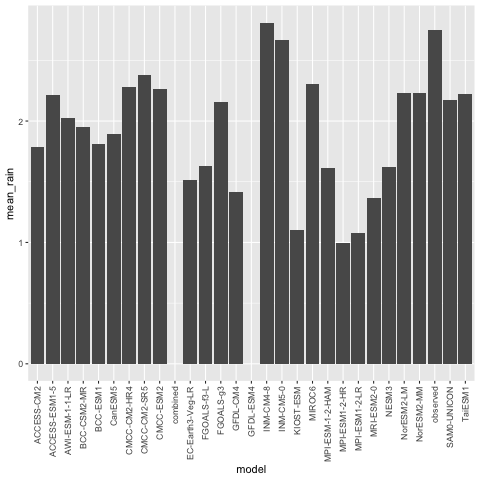

CPU times: user 30.3 s, sys: 42.5 s, total: 1min 12s
Wall time: 2min 27s


In [8]:
%%time
%%R
names(df_ae_final) <- make.names(names(df_ae_final), unique=TRUE)
df_ae_final %>% group_by(model) %>% summarise(mean_rain = mean(rain..mm.day.)) %>% ggplot((aes(x=model,y=mean_rain))) + geom_bar(stat='identity')+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
                                              
                                              
                                              
                                              

In [9]:
%%time
%%R
str(df_ae_final)

tibble [187,541,589 × 7] (S3: tbl_df/tbl/data.frame)
 $ time         : POSIXct[1:187541589], format: "1889-01-01 04:00:00" "1889-01-02 04:00:00" ...
 $ lat_min      : num [1:187541589] -35.4 -35.4 -35.4 -35.4 -35.4 ...
 $ lat_max      : num [1:187541589] -33.6 -33.6 -33.6 -33.6 -33.6 ...
 $ lon_min      : num [1:187541589] 142 142 142 142 142 ...
 $ lon_max      : num [1:187541589] 143 143 143 143 143 ...
 $ rain..mm.day.: num [1:187541589] 4.24e-13 4.22e-13 4.50e-13 4.25e-13 4.27e-13 ...
 $ model        : chr [1:187541589] "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" "MPI-ESM-1-2-HAM" ...
CPU times: user 204 ms, sys: 177 ms, total: 381 ms
Wall time: 986 ms


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(load chart 1) | Time taken(str)|
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Pro   | 16GB    |    AMD Ryzen 9 5000Series    |   Y    |         | |
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | | |
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)|  8 GB   |     Apple M1      |   Yes     |       | |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    | 2min 45s  |986 ms |